In [17]:
from keras.models import Sequential, save_model
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

In [18]:
inputShape = (128, 128, 1)

## CNN Layers

In [19]:
model = Sequential()
model.add(Conv2D(filters = 4, 
                 kernel_size = (3, 3), 
                 input_shape= inputShape, 
                 strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## FCC Layers

In [20]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(26))
model.add(Activation('sigmoid'))

## Compile

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 4)       40        
_________________________________________________________________
activation_28 (Activation)   (None, 126, 126, 4)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 8)         296       
_________________________________________________________________
activation_29 (Activation)   (None, 61, 61, 8)         0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 16)        1168      
__________

## Dataset

In [22]:
batch_size = 16

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        'dataset/train',  # this is the target directory
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(128, 128),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

Found 187586 images belonging to 26 classes.
Found 20777 images belonging to 26 classes.


## Train

In [23]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('model_1.h5')  # always save your weights after training or during training

Epoch 1/25
125/125 [==============================] - 8s 68ms/step - loss: 7.2767 - acc: 0.0440 - val_loss: 3.1843 - val_acc: 0.0462
Epoch 2/25
125/125 [==============================] - 8s 61ms/step - loss: 3.1417 - acc: 0.0965 - val_loss: 3.0817 - val_acc: 0.1100
Epoch 3/25
125/125 [==============================] - 8s 61ms/step - loss: 2.9768 - acc: 0.1265 - val_loss: 2.7509 - val_acc: 0.1925
Epoch 4/25
125/125 [==============================] - 8s 67ms/step - loss: 2.6014 - acc: 0.2265 - val_loss: 2.2667 - val_acc: 0.3538
Epoch 5/25
125/125 [==============================] - 9s 71ms/step - loss: 2.2505 - acc: 0.3345 - val_loss: 1.9744 - val_acc: 0.4512
Epoch 6/25
125/125 [==============================] - 8s 66ms/step - loss: 1.8818 - acc: 0.4385 - val_loss: 1.5296 - val_acc: 0.5363
Epoch 7/25
125/125 [==============================] - 8s 65ms/step - loss: 1.5874 - acc: 0.5225 - val_loss: 1.3269 - val_acc: 0.6025
Epoch 8/25
125/125 [==============================] - 8s 66ms/step - 

## Score

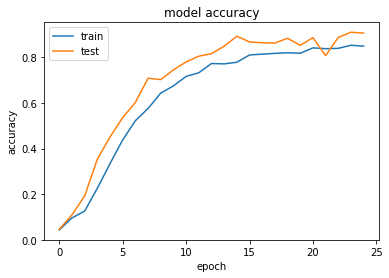

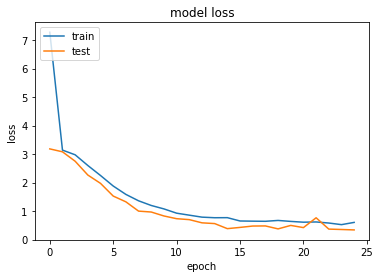

In [24]:
import matplotlib.pyplot as plt
import numpy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving Model

In [26]:
model_yaml = model.to_yaml()
with open("bin/model_1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
save_model(model, 'bin/model_1.h5')